# Assignment 3
- Leticia Genao
- 5/27/24

In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV,ParameterGrid, train_test_split,cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


# URLs for the red and white wine datasets
red_wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
white_wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

# Loading the datasets into pandas dataframes
red_wine_data = pd.read_csv(red_wine_url, sep=';')
white_wine_data = pd.read_csv(white_wine_url, sep=';')


In [15]:
print(red_wine_data.head())
print(red_wine_data.shape)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [16]:
print(white_wine_data.head())
print(white_wine_data.shape)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [17]:
# Normalizing the 'quality' feature to a 0-1 scale
red_wine_data['quality'] = (red_wine_data['quality'] - 3) / (8 - 3)  # Red wine quality ranges from 3 to 8
white_wine_data['quality'] = (white_wine_data['quality'] - 3) / (9 - 3)  # White wine quality ranges from 3 to 9

In [18]:
# Combining red and white wine datasets
df = pd.concat([red_wine_data, white_wine_data], ignore_index=True)

# Data Exploration

# Show all the data
print("Basic DataFrame information:")
print(df.info())
print(df)

# Check for missing values
print(df.isnull().sum())

# Show the first five rows of the DataFrame
df.head()

Basic DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   float64
dtypes: float64(12)
memory usage: 609.2 KB
None
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4  

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0.4
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0.4
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0.6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.4


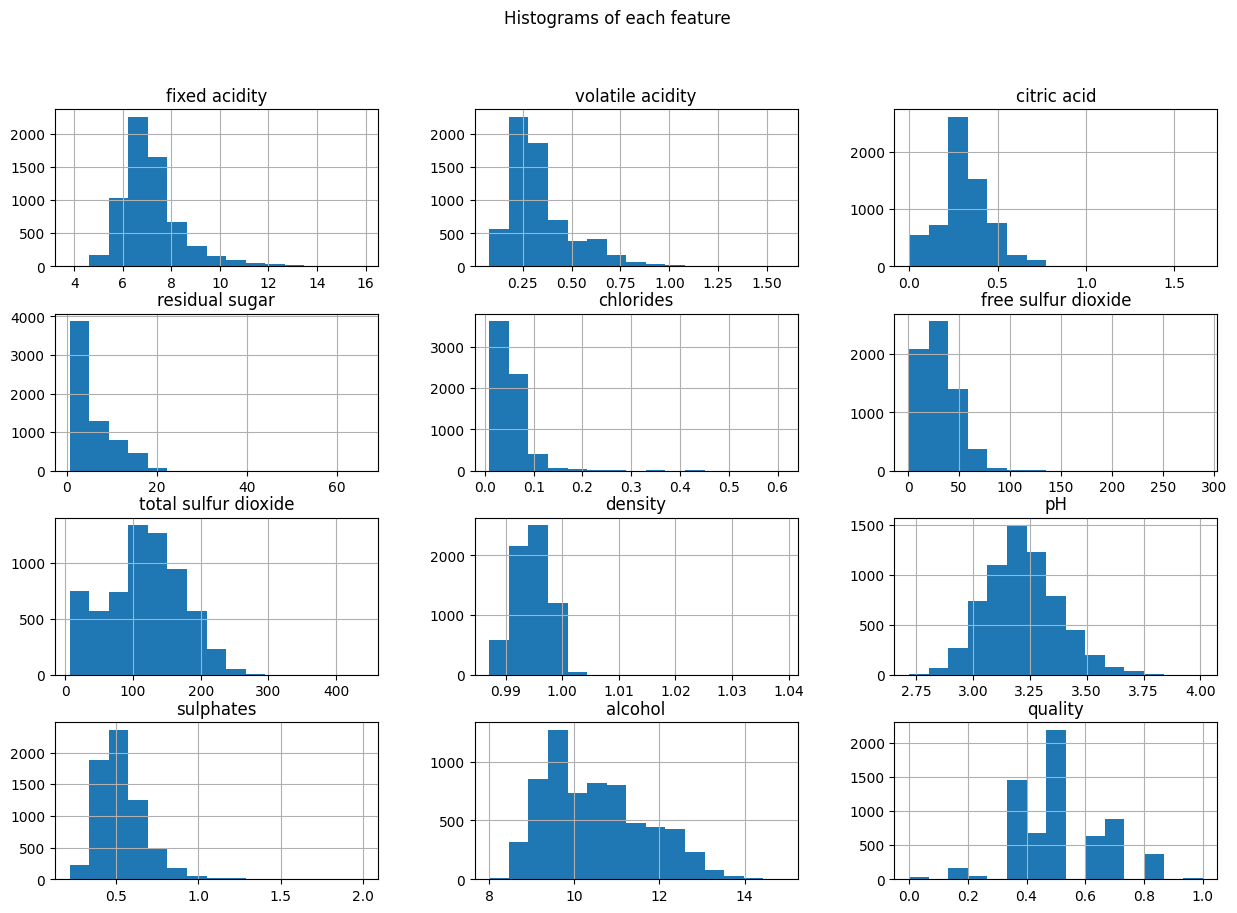

In [19]:
# Histograms for each feature
df.hist(bins=15, figsize=(15, 10), layout=(4, 3))
plt.suptitle('Histograms of each feature')
plt.show()


#**Notes**

***Skewness and Concentration:***
  * The distributions of many parameters in the wine dataset, including residual sugar, sulfur dioxide levels, chlorides, and volatile acidity, are skewed to the right. This skewness implies that some wines have far higher concentrations of these chemicals than the majority, which have relatively modest levels in most wines. 
  
***Normal and Nearly Normal Distributions:*** 
  * Certain salient characteristics, such as alcohol and pH, exhibit more symmetric distributions. The nearly normal pH distribution indicates that wines should have a fairly constant acid balance. The distribution of alcohol concentration is likewise somewhat left-skewed but is otherwise reasonably symmetric.


***Implications for Quality Control*** 
* Certain features' skewness and unpredictability suggest places where winemakers should concentrate their quality control efforts. For instance, keeping residual sugars and sulfur dioxide levels under control may be essential to preserving desired flavor profiles and avoiding spoiling, as well as ensuring that alcohol and pH levels stay within ideal bounds to preserve consistency in style.

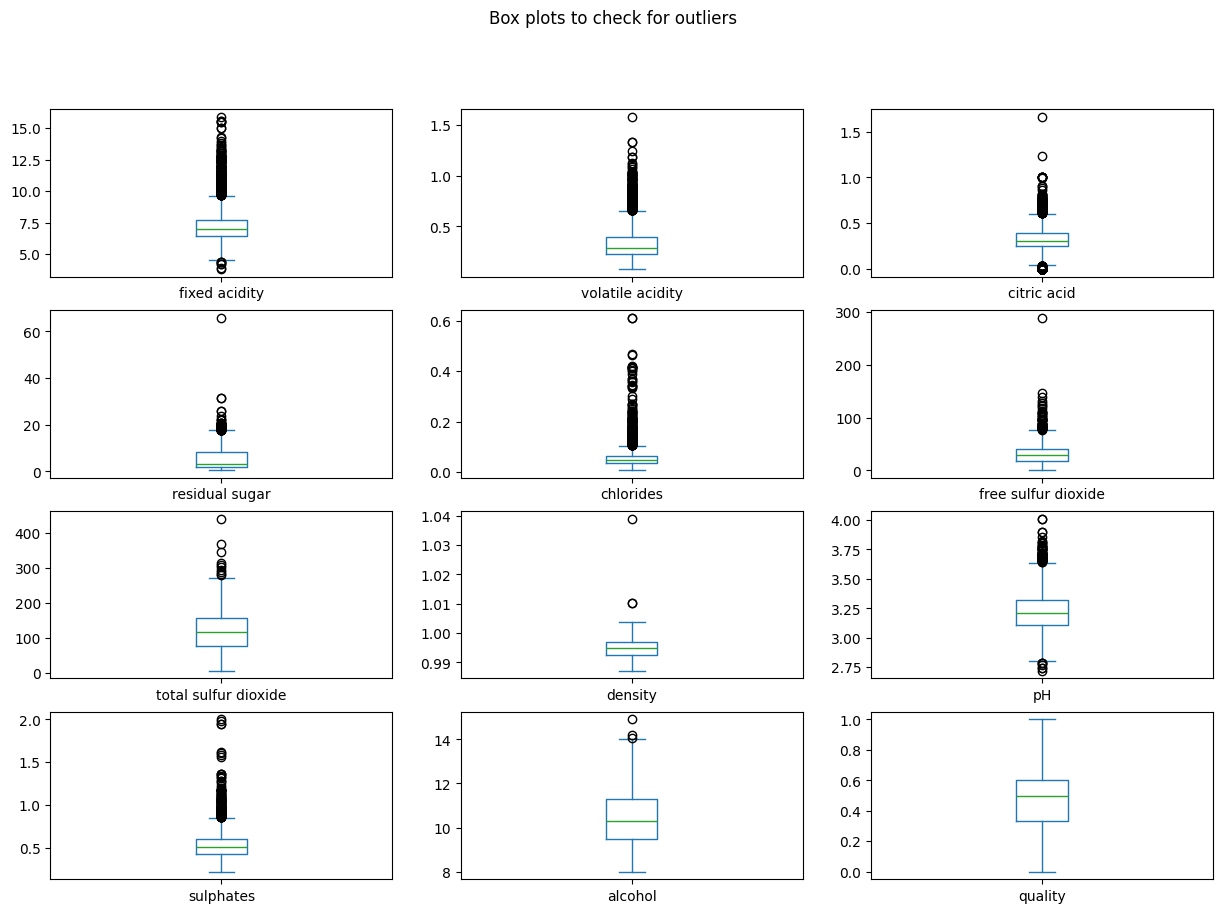

In [20]:
# Box plots to check for outliers
df.plot(kind='box', subplots=True, layout=(4, 3), sharex=False, sharey=False, figsize=(15, 10))
plt.suptitle('Box plots to check for outliers')
plt.show()

#**Notes**

*****Outliers**:***
  * The distributions of many parameters in the wine dataset, including residual sugar, sulfur dioxide levels, chlorides, and volatile acidity, are skewed to the right. This skewness implies that some wines have far higher concentrations of these chemicals than the majority, which have relatively modest levels in most wines. 
  
***Normal and Nearly Normal Distributions:*** 
  * Certain salient characteristics, such as alcohol and pH, exhibit more symmetric distributions. The nearly normal pH distribution indicates that wines should have a fairly constant acid balance. The distribution of alcohol concentration is likewise somewhat left-skewed but is otherwise reasonably symmetric.

***Implications for Quality Control*** 
* Certain features' skewness and unpredictability suggest places where winemakers should concentrate their quality control efforts. For instance, keeping residual sugars and sulfur dioxide levels under control may be essential to preserving desired flavor profiles and avoiding spoiling, as well as ensuring that alcohol and pH levels stay within ideal bounds to preserve consistency in style.

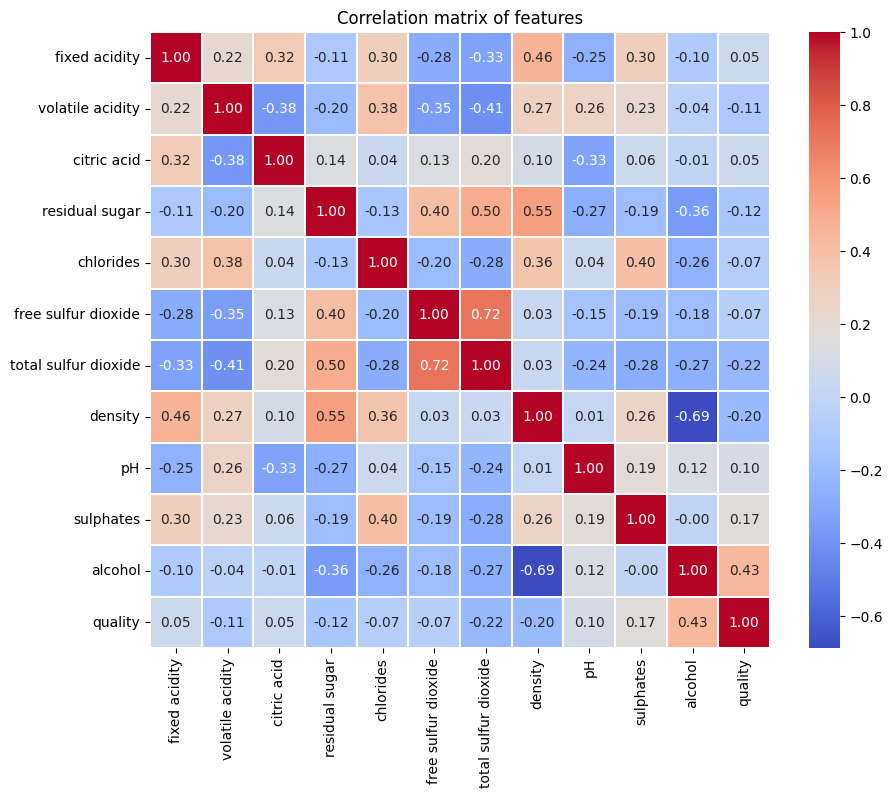

In [21]:
# Correlation matrix heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Correlation matrix of features')
plt.show()


#**Notes**

***Strong Correlations:***
  * Strong correlations between total sulfur dioxide and free sulfur dioxide (0.72) suggest that wines with high levels of one usually have high levels of the other.
There is a substantial negative association (-0.69) between density and alcohol, whereby increased alcohol content usually results in lower wine density.
  
***Moderate Correlations:***  
* The moderately negative correlation (-0.25) between fixed acidity and pH suggests that increasing acidity reduces pH.
Density and residual sugar show a moderately positive connection (0.55), suggesting that denser wines are those with more sugar.

***Weak Correlations:*** 
* Alcohol content and quality show a moderately positive connection (0.44), suggesting that greater alcohol content wines may be thought to be of higher quality.
The weakly negative correlation between volatile acidity and citric acid (-0.38) indicates that wines with higher citric acid content have lower volatile acidity.

# **Data Cleaning and Preprocessing**

In [22]:
# Converting column names to snake_case for consistency and easier coding
df.columns = [col.strip().replace(' ', '_').lower() for col in df.columns]

print(df.columns)
print(df.head())
print(df.shape)

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3        

In [23]:
# Using the IQR to filter outliers in the 'alcohol' column
Q1 = df['alcohol'].quantile(0.25)
Q3 = df['alcohol'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering out the outliers
df = df[(df['alcohol'] >= lower_bound) & (df['alcohol'] <= upper_bound)]
print(df.shape)

(6494, 12)


# Modeling

In [24]:
# Defining the features, target variable, and dropping less relevant features

X = df.drop(['quality','fixed_acidity', 'residual_sugar', 'free_sulfur_dioxide', 'chlorides', 'density'], axis=1)
y = df['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Setting up a pipeline with a scaler and a linear model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge())
])

# Define the parameter grid
param_grid = {
    'regressor__alpha': [0.1, 1.0, 10.0, 100.0]  # Regularization strength
}

# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Outputting the best parameters and the best score found by GridSearchCV
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score (negative MSE):", grid_search.best_score_)

# Evaluating the best model found by the grid search on the test set
y_pred = grid_search.predict(X_test)
print("Test MSE:", mean_squared_error(y_test, y_pred))
print("Test R2 Score:", r2_score(y_test, y_pred))


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters: {'regressor__alpha': 10.0}
Best cross-validation score (negative MSE): -0.01744805868301929
Test MSE: 0.017331423615627076
Test R2 Score: 0.2439295769518809


In [25]:
# Feature Testing: Reintroducing each feature one at a time and checing performance
features_to_test = ['fixed_acidity', 'residual_sugar', 'free_sulfur_dioxide', 'chlorides', 'density']
for feature in features_to_test:
    X_test_features = df.drop(['quality'], axis=1).drop(features_to_test, axis=1).join(df[feature])
    X_train, X_test, y_train, y_test = train_test_split(X_test_features, y, test_size=0.3, random_state=42)
    grid_search.fit(X_train, y_train)
    print(f"Testing Feature: {feature}")
    print("Best Parameters:", grid_search.best_params_)
    y_pred = grid_search.predict(X_test)
    print("Test MSE:", mean_squared_error(y_test, y_pred))
    print("Test R2 Score:", r2_score(y_test, y_pred))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Testing Feature: fixed_acidity
Best Parameters: {'regressor__alpha': 100.0}
Test MSE: 0.017247193212291023
Test R2 Score: 0.24760406544723912
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Testing Feature: residual_sugar
Best Parameters: {'regressor__alpha': 10.0}
Test MSE: 0.01710519454240582
Test R2 Score: 0.25379865146587244
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Testing Feature: free_sulfur_dioxide
Best Parameters: {'regressor__alpha': 10.0}
Test MSE: 0.017055120135046346
Test R2 Score: 0.25598311012292285
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Testing Feature: chlorides
Best Parameters: {'regressor__alpha': 100.0}
Test MSE: 0.017335017052447357
Test R2 Score: 0.2437728159519098
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Testing Feature: density
Best Parameters: {'regressor__alpha': 10.0}
Test MSE: 0.017019560038252037
Test R2 Score: 0.2575343928117068

# Notes
* In terms of R2 Score, residual sugar and density appear to offer the biggest gains, suggesting their applicability in forecasting wine quality. In instance, density has the greatest improvement in both MSE and R2 Score, indicating that it may be a significant predictor that picks up on information not captured by other variables.
* The model's R2 Score also noticeably improves for free sulfur dioxide, suggesting that it could be a useful predictor.
* Chlorides and fixed acidity provide mediocre gains. The R2 Score is somewhat higher with Fixed Acidity than with Chlorides.


In [26]:
# Feautures
X_final = df[['density', 'residual_sugar', 'free_sulfur_dioxide', 'alcohol']]
# Target variable
y = df['quality']
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

# Setting up the pipeline with a scaler and Ridge regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge())
])

# Defining the parameter grid for Ridge Regression
param_grid = {
    'regressor__alpha': [0.1, 1.0, 10.0, 100.0]  # Exploring different regularization strengths
}

# Setting up GridSearchCV to find the best parameters
final_grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
final_grid_search.fit(X_train, y_train)

# Outputting the best parameters and the best score
print("Final Best Parameters:", final_grid_search.best_params_)
print("Best cross-validation score (negative MSE):", final_grid_search.best_score_)

# Evaluate the best model on the test data
final_pred = final_grid_search.predict(X_test)
print("Final Test MSE:", mean_squared_error(y_test, final_pred))
print("Final Test R2 Score:", r2_score(y_test, final_pred))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Final Best Parameters: {'regressor__alpha': 10.0}
Best cross-validation score (negative MSE): -0.018485450351885507
Final Test MSE: 0.018216806927331814
Final Test R2 Score: 0.20530539062498476
